# Assignment

1. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?
2. What are potential problems with implementing kNN on a very large dataset?
3. Describe the training set and test set accuracy as the value of K increases?<
4. Which one of the statements are true:
    * KNN performs much better if all of the data have the same scale
    * KNN works well with a small number of input variables (p), but struggles when the number of inputs is very large
    * KNN makes no assumptions about the functional form of the problem being solved
5. Calculate the distance between A(1,3) and B(2,3) based on Euclidean and Manhattan

# Solutions

### 1. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = pd.read_csv('model.csv')

In [6]:
data.drop(columns=['Unnamed: 0', 'lemma'], inplace=True)

In [7]:
data.head()

,target_dis,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1.0,0.056922,0.164624,-0.083723,0.089162,-0.006487,0.037945,-0.050944,0.053486,0.033037,...,0.057478,-0.058441,-0.054603,-0.155688,-0.209076,0.000846,-0.143593,-0.064243,0.185596,0.117643
1,1.0,0.060277,0.166590,-0.078193,0.073723,0.009763,0.023502,-0.020445,0.049496,0.031500,...,0.052591,-0.069445,-0.029355,-0.166402,-0.210763,0.023176,-0.138070,-0.083936,0.162599,0.099778
2,1.0,0.066689,0.154519,-0.125050,0.053231,0.002072,0.029694,-0.071555,0.038849,0.042394,...,0.041421,-0.097197,-0.072598,-0.173655,-0.164762,0.070325,-0.142533,-0.093090,0.132454,0.099096
3,1.0,0.068864,0.181199,-0.092173,0.045284,0.017526,0.018162,-0.043599,0.047741,0.040678,...,0.070997,-0.082225,-0.077213,-0.190998,-0.150294,0.050184,-0.116984,-0.079039,0.198876,0.125751
4,1.0,0.065049,0.108286,-0.097758,0.078894,-0.016895,0.064657,-0.077155,0.036124,0.007987,...,0.072197,-0.047028,-0.052295,-0.127663,-0.195309,0.023115,-0.123895,-0.044071,0.132321,0.099286


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Columns: 101 entries, target_dis to 99
dtypes: float64(101)
memory usage: 5.8 MB


### K-Nearest Neighbor Classification

In [9]:
neighbors = KNeighborsClassifier(n_neighbors=7)
X = data.iloc[:,1:]
Y = data['target_dis']
neighbors.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42 )
predictions = neighbors.predict(X_test)

cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73      1291
         1.0       0.64      0.57      0.60       968

    accuracy                           0.68      2259
   macro avg       0.67      0.67      0.67      2259
weighted avg       0.68      0.68      0.68      2259



In [10]:
neighbors.score(X_train, y_train)

0.6852695520121488

### KNN Regression

In [11]:
from sklearn import neighbors

In [12]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)

In [13]:
X = data.iloc[:,1:]
Y = data['target_dis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42 )

knn.fit(X_train, y_train)

knn_Y_ = knn.predict(X_test)

### OLS Regression

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [24]:
X = data.iloc[:,1:]
Y = data['target_dis']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42 )

OLS_reg = linear_model.LinearRegression()

OLS_reg.fit(X_train, y_train)

OLS_Y_ = OLS_reg.predict(X_test)

Text(0, 0.5, 'OLS prediction')

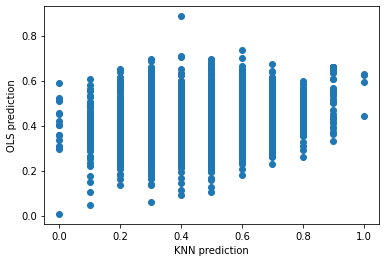

In [25]:
import matplotlib.pyplot as plt
plt.scatter(knn_Y_, OLS_Y_)
plt.xlabel('KNN prediction')
plt.ylabel('OLS prediction')

### 2. 

KNN is computationally inefficient because for every point, it processes all points in the set in order to calculate the distances. Also after calculating all distances, it goes through all points to find the nearest point. Its order of complexity is n-squared.

### 3. 

With small k values, model will perfectly fit train data and accuracy will be high. However because of model captures all noise in the training set, test set accuracy will be smaller.

With high k values, model will smoothly fit the data and there will be a simpler model. Therefore, train set accuracy may be smaller than the model with low k values. The model may have have similar or higher accuracy on test data.

### 4.

 a. True  
 b. True  
 c. True  

### 5.

In [128]:
from scipy.spatial import distance
A = (1,3)
B = (2,3)
dist1 = distance.euclidean(A, B)
dist2 = distance.cityblock(A, B)

print('Euclidean:',dist1, '\nManhattan:',dist2)

Euclidean: 1.0 
Manhattan: 1
